Summary Statistics:
        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.00

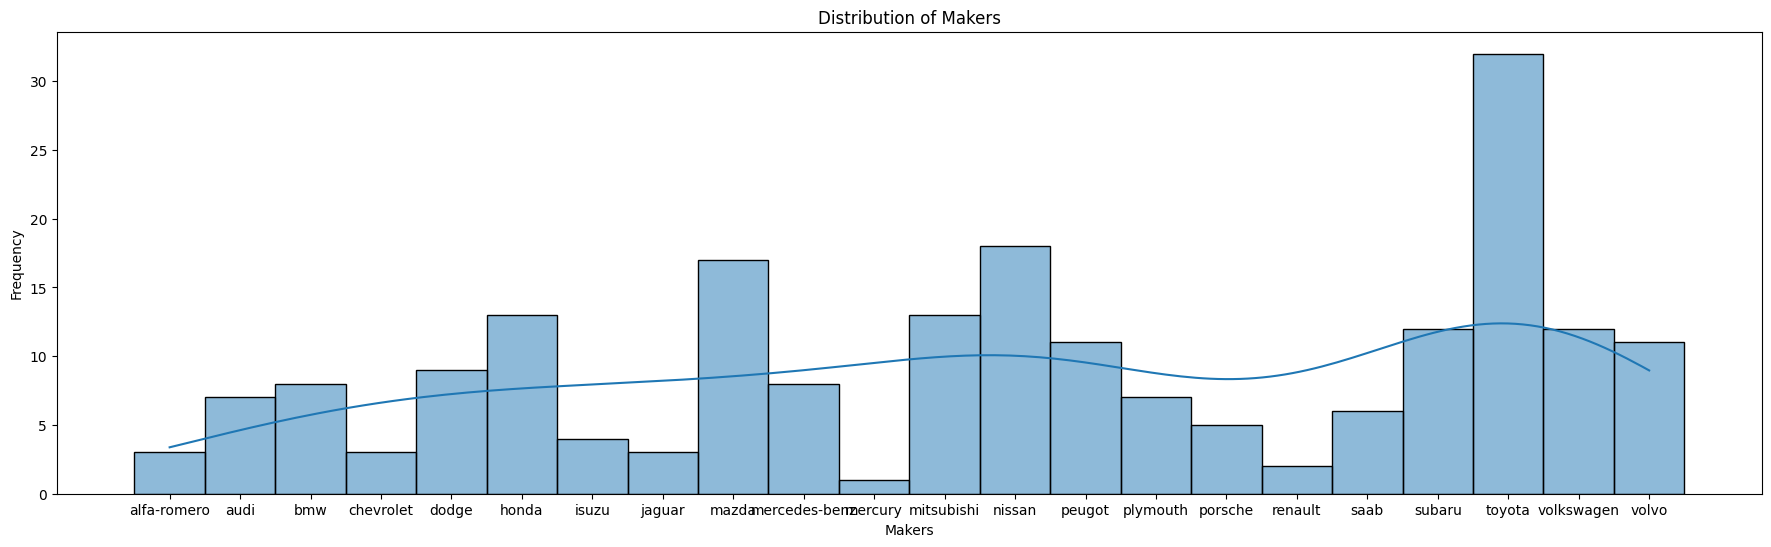

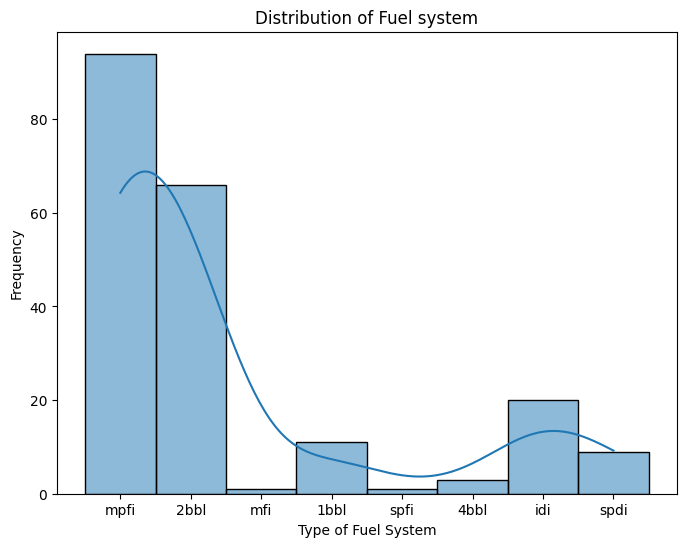

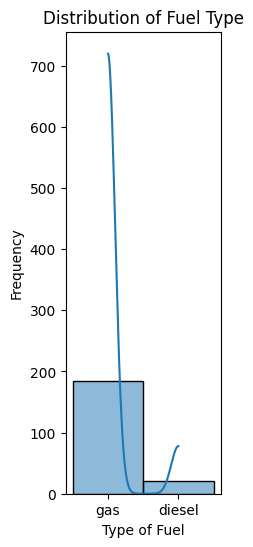

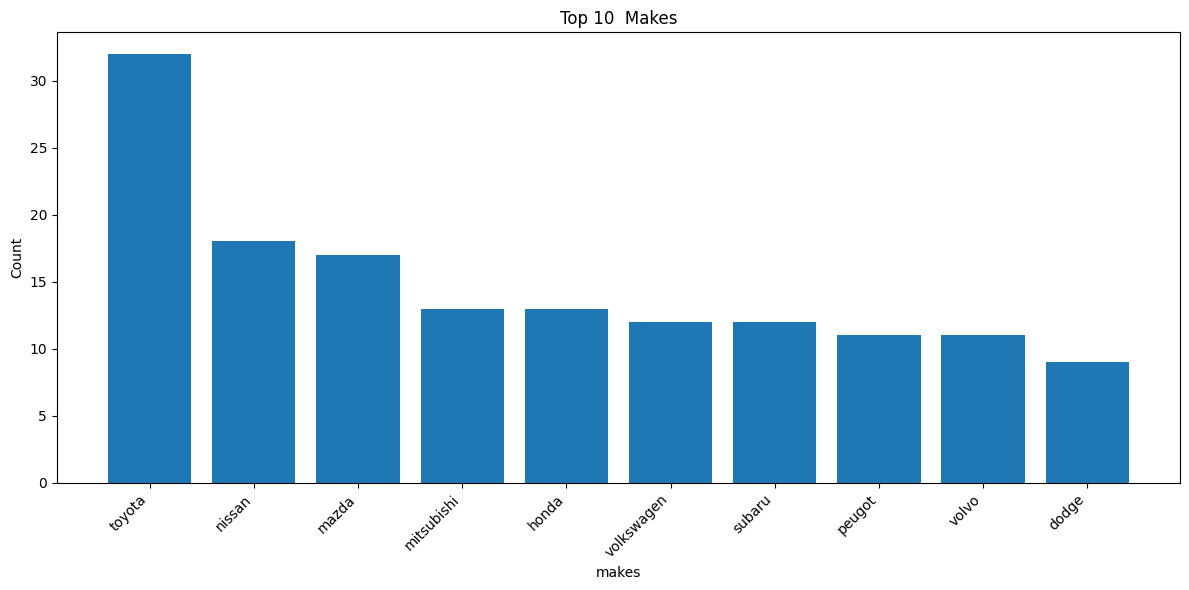

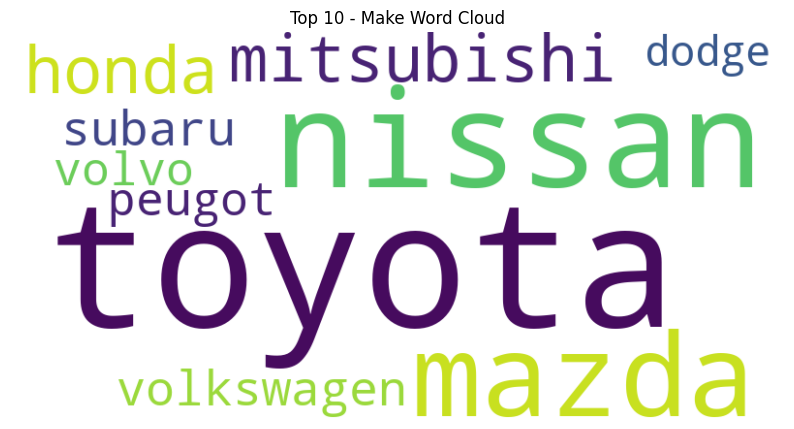

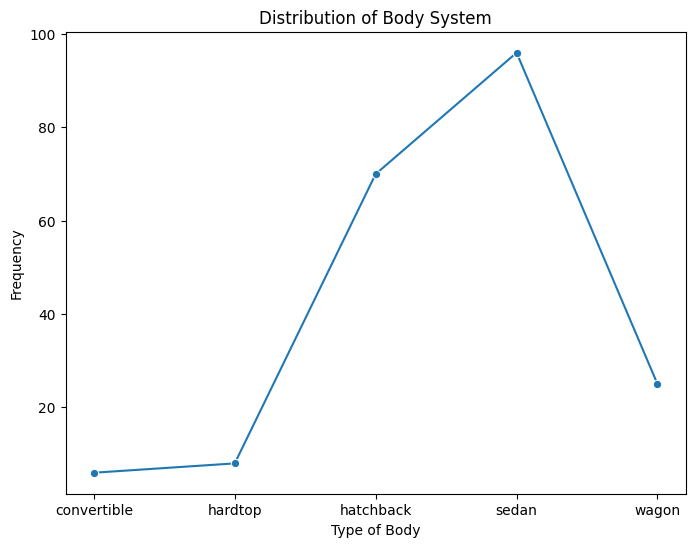

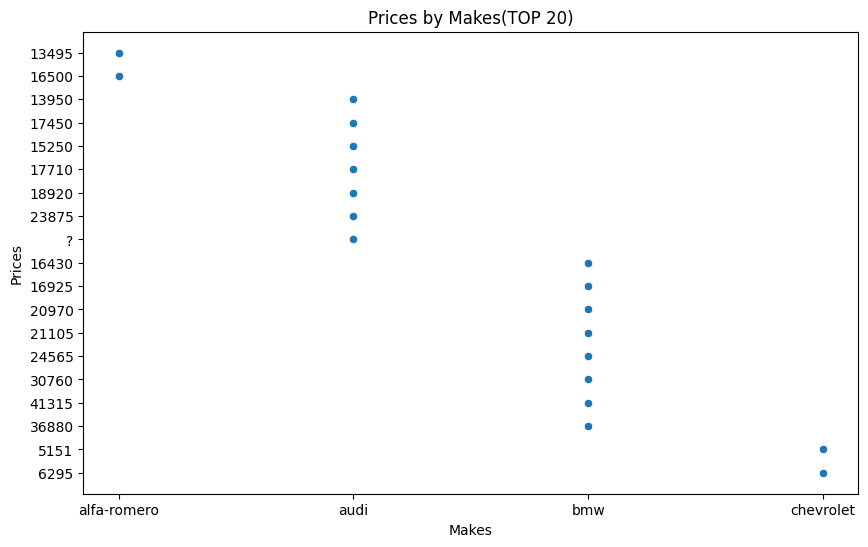

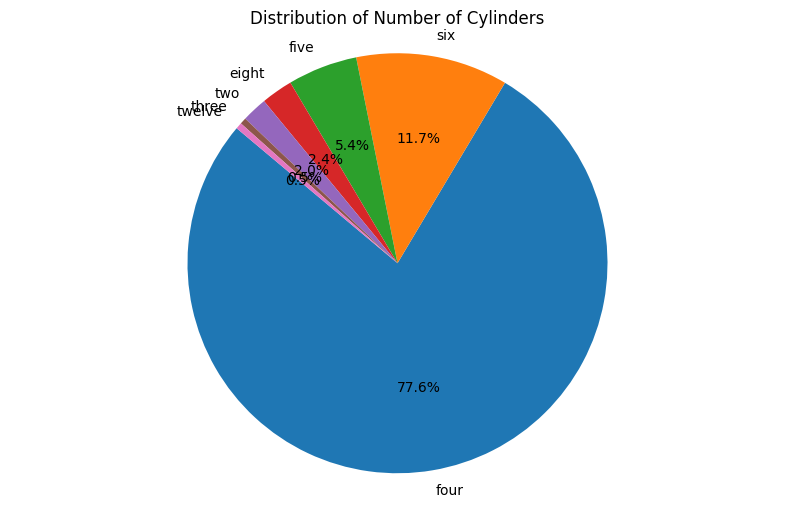

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from wordcloud import WordCloud

# Load the dataset from the provided link
url = "https://raw.githubusercontent.com/rushabh-mehta/EDA-on-Automobile-Dataset/master/Automobile_data.csv"
response = requests.get(url)
csv_data = StringIO(response.text)
data = pd.read_csv(csv_data)

# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

#Histogram of Makes
plt.figure(figsize=(22, 6))
sns.histplot(data=data, x='make', kde=True)
plt.title('Distribution of Makers')
plt.xlabel('Makers')
plt.ylabel('Frequency')
plt.show()

#Histogram of Fuel system
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='fuel-system', kde=True)
plt.title('Distribution of Fuel system')
plt.xlabel('Type of Fuel System')
plt.ylabel('Frequency')
plt.show()

#Histogram of Fuel type
plt.figure(figsize=(2, 6))
sns.histplot(data=data, x='fuel-type', kde=True)
plt.title('Distribution of Fuel Type')
plt.xlabel('Type of Fuel')
plt.ylabel('Frequency')
plt.show()

#Top 10 makes
top_10_titles = data['make'].value_counts().head(10)

# Create a bar plot for the top 20 makes
plt.figure(figsize=(12, 6))
plt.bar(top_10_titles.index, top_10_titles.values)
plt.xlabel('makes')
plt.ylabel('Count')
plt.title('Top 10  Makes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_10_titles = data['make'].value_counts().head(10)

# Create a dictionary of job titles and their counts
title_counts = dict(top_10_titles)

#Word Cloud Object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 - Make Word Cloud')
plt.show()
#line plot
body_style_counts = data['body-style'].value_counts().reset_index()
body_style_counts.columns = ['body-style', 'count']

# Sort the data by the 'fuel-system' column if necessary
body_style_counts = body_style_counts.sort_values('body-style')

# Line Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=body_style_counts, x='body-style', y='count', marker='o')
plt.title('Distribution of Body System')
plt.xlabel('Type of Body')
plt.ylabel('Frequency')
plt.show()

#Scatter Plot 
top_10_data = data.head(20)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_data, x='make', y='price')
plt.title('Prices by Makes(TOP 20)')
plt.xlabel('Makes')
plt.ylabel('Prices')
plt.show()

#pie chart
cylinder_counts = data['num-of-cylinders'].value_counts().reset_index()
cylinder_counts.columns = ['num-of-cylinders', 'count']

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(cylinder_counts['count'], labels=cylinder_counts['num-of-cylinders'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Number of Cylinders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()